<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/03.07-Fed-Batch-Bioreactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fed-Batch Bioreactor

This notebook shows how to use [`gekko`](https://gekko.readthedocs.io/en/latest/) to simulate a fed-batch bioreactor dynamic model.

\begin{align*}
\frac{d[X(t)V(t)]}{dt} &= V(t)r_g(t) \\
\frac{d[P(t)V(t)]}{dt} &= V(t)r_p(t) \\
\frac{d[S(t)V(t)]}{dt} &= F(t)S_f - \frac{1}{Y_{X/S}}V(t)r_g(t) - \frac{1}{(Y_{P/S})}V(t)r_p(t) \\
\frac{dV(t)}{dt} &= F(t) \\
r_g(t) &= \mu(t)X(t) \\
r_p(t) &= Y_{P/X}r_g(t) \\
\mu(t) &= \mu_{max}\frac{S(t)}{K_S + S(t)}
\end{align*}

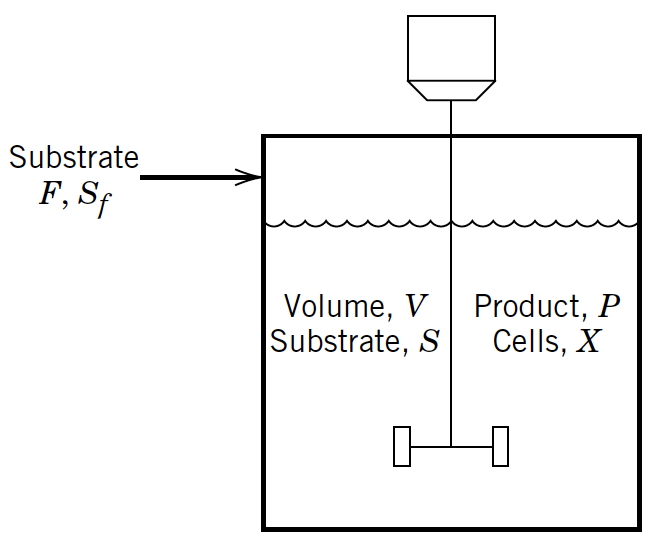   
Source: Figure 2.11 from Seborg 4<sup>th</sup> ed. p. 29.

In [3]:
!pip install gekko
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 94.5 MB/s eta 0:00:00


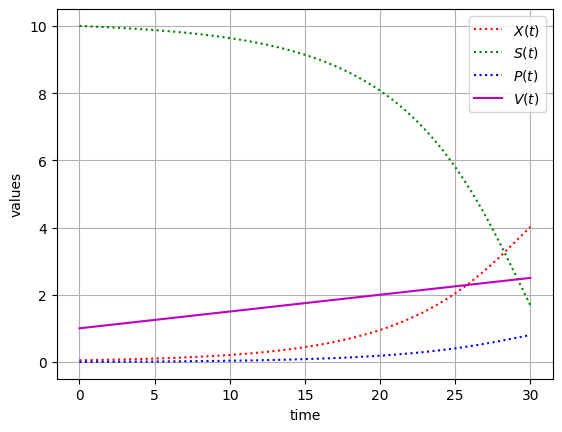

In [31]:
# model creation
m = GEKKO(remote=False)

# model parameters
mu_max = m.Const()
K_s = m.Const()
Y_X_S = m.Const()
Y_P_X = m.Const()
Y_P_S = m.Const()
S_f = m.Const()

# model input variable(s)
F = m.Param()

# model output variable(s)
X = m.Var(0.05)
S = m.Var(10.0)
P = m.Var(0.0)
V = m.Var(1.0)
r_g = m.Var(0.0)
r_p = m.Var(0.0)
mu = m.Var(0.0)

# model equations
m.Equation((X*V.dt()+V*X.dt())==V*r_g)
m.Equation((S*V.dt()+V*S.dt())==F*S_f - (1/Y_X_S)*V*r_g - (1/(Y_X_S/Y_P_X))*V*r_p)
m.Equation((P*V.dt()+V*P.dt())==V*r_p)
m.Equation(V.dt()==F)
m.Equation(r_g==mu*X)
m.Equation(r_p==Y_P_X*r_g)
m.Equation(mu==mu_max*S/(K_s + S))

# simulation time
tfinal = 30
npoints = 10*tfinal+1
m.time = np.linspace(0,tfinal,npoints)

# model parameters definition
mu_max.value = 0.20
K_s.value = 1.0
Y_X_S.value = 0.5
Y_P_X.value = 0.2
Y_P_S.value = Y_X_S.value*Y_P_X.value
S_f.value = 10.0

# model input definition
F.value = 0.05

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,X.value,'r:',label='$X(t)$')
plt.plot(m.time,S.value,'g:',label='$S(t)$')
plt.plot(m.time,P.value,'b:',label='$P(t)$')
plt.plot(m.time,V.value,'m-',label='$V(t)$')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()